<a href="https://colab.research.google.com/github/sarbanibhadra/NeuralNet_Regression_Predict_MedicalInsurance/blob/main/PredictMedicalInsurance_NeuralNetworkModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Medical Insurance cost using neural network regression model

In this project we are processing medical cost personal dataset and predict insurance forcase using neural network model. So here is the question "Can we accurately predict insurance costs?"

## Import required libraries

Import required libraries related to machine learning modelling, data processing and plotting. These are basic libraries required for any machine learning modelling tasks.


In [3]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


## Download data from its source

Downloaded data from kaggle's dataset repository. Here is the link to the dataset https://www.kaggle.com/datasets/mirichoi0218/insurance

In [10]:
# Read data from csv file
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")

In [44]:
# Here is our insurance data
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Preprocessing data
### Prepare training and testing datasets
Generate training and testing datasets from master dataset, which is insurace dataset using scikitlearn library.


In [12]:
X = insurance.drop("charges", axis=1)
y = insurance["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


To preprocess and feature scaling our data we need to borrow some classes from scikitlearn.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create the column transformer
column_trans = make_column_transformer(
    (MinMaxScaler(),["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]))

# Fit the column transformer
column_trans.fit(X_train)

# Normalise and standardised the data
X_train_normal = column_trans.transform(X_train)
X_test_normal = column_trans.transform(X_test)

len(X_train_normal)

1070

##ML modelling
###Build, compile and run the model
Build the model using a input layer, output layer and a hidden layer. In the first model, the input layer has 100 neurons wherese the hidden layer has 10 neurons. The model is compiled with mae loss function and Adam has been set as optimizer. Train the model using normalised training data with epochs 100.

In [11]:
# Set random seed
tf.random.set_seed(42)

# Build the model
insurance_model_norm = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_norm.compile(loss=tf.keras.losses.mae,
                             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                             metrics=["mae"])

# Fit the model
insurance_model_norm.fit(X_train_normal, y_train, epochs=100, verbose=0)

## Evaluate the model
Use the evaluate method to evaluate the model.

In [24]:
insurance_model_norm.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3212.7891 - mae: 3212.7891  


[3159.339599609375, 3159.339599609375]

##Improve the model
### 1. Add another layer

In [19]:
# Set random seed
tf.random.set_seed(42)

# Improve the model
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_1.compile(loss=tf.losses.mae,
                          optimizer=tf.optimizers.Adam(learning_rate=0.001),
                          metrics=["mae"])

insurance_model_1.fit(X_train_normal, y_train, epochs=100, verbose=0)
insurance_model_1.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3214.6245 - mae: 3214.6245  


[3159.572509765625, 3159.572509765625]

### 2. Run the model for longer

In [15]:
insurance_model_1.fit(X_train_normal, y_train, epochs=500, verbose=0)
insurance_model_1.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3212.2493 - mae: 3212.2493 


[3160.31103515625, 3160.31103515625]

### 3. Add more neurons in model layers

In [16]:
# Set random seed
tf.random.set_seed(42)

insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                          metrics=["mae"])

insurance_model_2.fit(X_train_normal, y_train, epochs=500, verbose=0)
insurance_model_2.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3211.6558 - mae: 3211.6558  


[3160.242919921875, 3160.242919921875]

### 4. Change the optimizer learning rate

In [40]:
from re import VERBOSE
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
                          metrics=["mae"]
                          )

# 3. Fit the model
history = insurance_model_3.fit(X_train_normal, y_train, epochs=500, verbose=0 )

In [41]:
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3237.1646 - mae: 3237.1646  


[3172.351318359375, 3172.351318359375]

Text(0.5, 0, 'epochs')

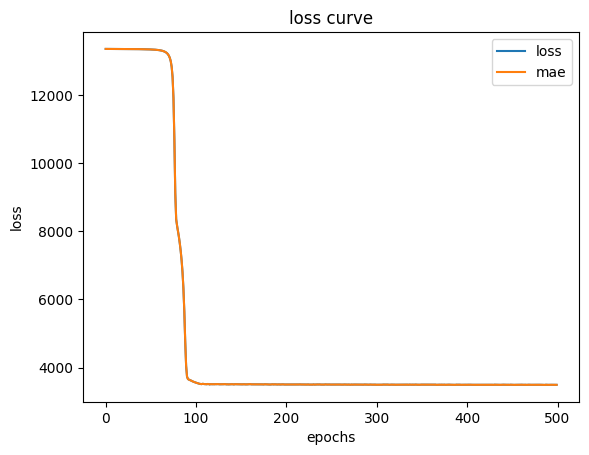

In [42]:
pd.DataFrame(history.history).plot()
plt.title("loss curve")
plt.ylabel("loss")
plt.xlabel("epochs")


### Best performing model
Based on the evaluation metrics of three models, the insurance_model_2 has performed better than other models and becomes the best performing model.

In [43]:
insurance_model_2.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3211.6558 - mae: 3211.6558  


[3160.242919921875, 3160.242919921875]

##Save the best model

In [28]:
# Save the best model
insurance_model_2.save("insurance_model_2.h5")



## Load the save model

In [ ]:
# Load the saved model
insurance_model_final = tf.keras.models.load_model("insurance_model_2.h5")

##Predict Medical Insuarnace

In [46]:
X_train_normal[0], y_train[0]

(array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]),
 np.float64(16884.924))

In [47]:
# predict insuarnce charge
y=insurance_model_final.predict(tf.expand_dims(X_train_normal[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [48]:
y

array([[8912.854]], dtype=float32)